In [18]:
import pandas as pd

def data_pipeline(input_path, output_path):
    """
    Pipeline de données :
    - ingestion
    - nettoyage
    - transformation
    - export
    """
    
    # 1. Ingestion
    df = pd.read_excel(input_path)
    
    # 2. Normalisation des noms de colonnes
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    
    # 3. Suppression des valeurs manquantes
    df = df.dropna()
    
    # 4. Transformation date
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df['hour'] = df['date'].dt.hour
        df['day'] = df['date'].dt.day_name()
    
    # 5. Export
    df.to_csv(output_path, index=False)
    
    print("Pipeline exécuté avec succès ✅")
    return df


# Exécution du pipeline

In [19]:
df = data_pipeline(
    "../data/raw/mobility_urban_pollution_300.xlsx",
    "../data/processed/mobility_clean.csv"
)


Pipeline exécuté avec succès ✅


# ANALYSE EXPLORATOIRE DES DONNÉES (EDA)

### ANALYSE UNIVARIÉE

#### Mesures descriptives (variables numériques) 

In [20]:
df.describe()

,latitude,longitude,speed_kmh,traffic_density,air_quality_index
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,14.717840,-17.451813,28.786667,0.311400,63.910000
std,0.038572,0.059410,7.403865,0.168735,12.207593
min,14.650020,-17.549710,10.000000,0.050000,33.000000
25%,14.685437,-17.507530,24.000000,0.180000,55.000000
50%,14.720815,-17.454995,28.500000,0.285000,63.000000
75%,14.751825,-17.401743,33.000000,0.430000,72.250000
max,14.779590,-17.350730,48.000000,0.840000,97.000000


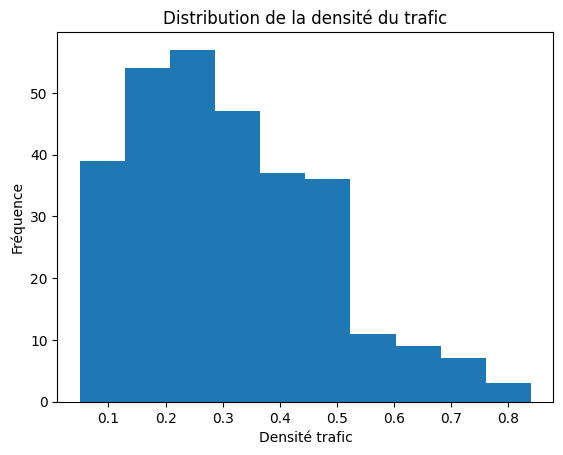

In [26]:
import matplotlib.pyplot as plt

# Histogramme Densité trafic
plt.figure()
plt.hist(df["traffic_density"])
plt.title("Distribution de la densité du trafic")
plt.xlabel("Densité trafic")
plt.ylabel("Fréquence")
plt.show()

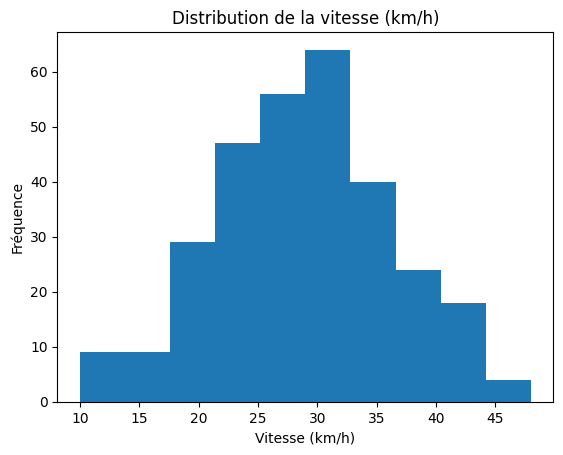

In [28]:
# Histogramme Vitesse
plt.figure()
plt.hist(df["speed_kmh"])
plt.title("Distribution de la vitesse (km/h)")
plt.xlabel("Vitesse (km/h)")
plt.ylabel("Fréquence")
plt.show()

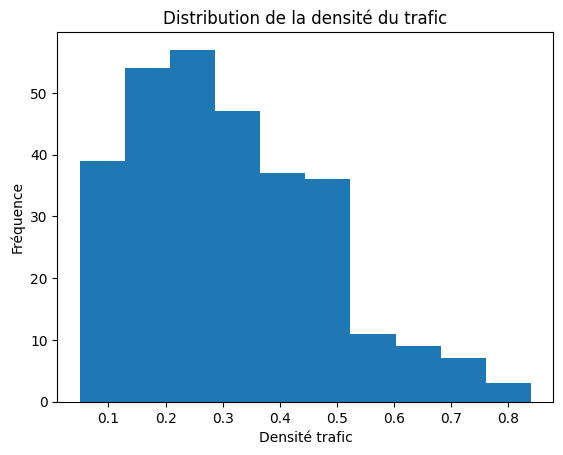

In [29]:
# Histogramme Densité trafic
plt.figure()
plt.hist(df["traffic_density"])
plt.title("Distribution de la densité du trafic")
plt.xlabel("Densité trafic")
plt.ylabel("Fréquence")
plt.show()

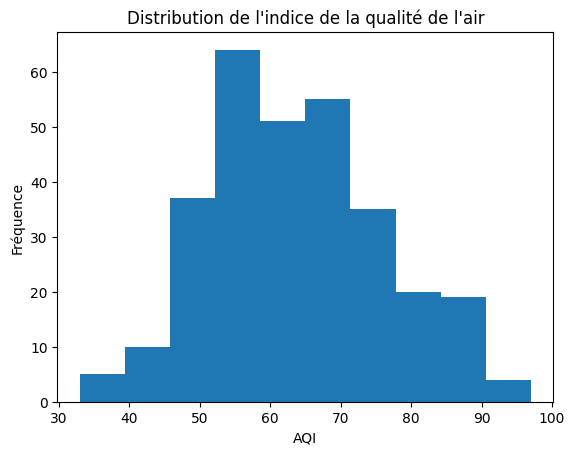

In [30]:
# Histogramme Vitesse
plt.figure()
plt.hist(df["air_quality_index"])
plt.title("Distribution de l'indice de la qualité de l'air")
plt.xlabel("AQI")
plt.ylabel("Fréquence")
plt.show()

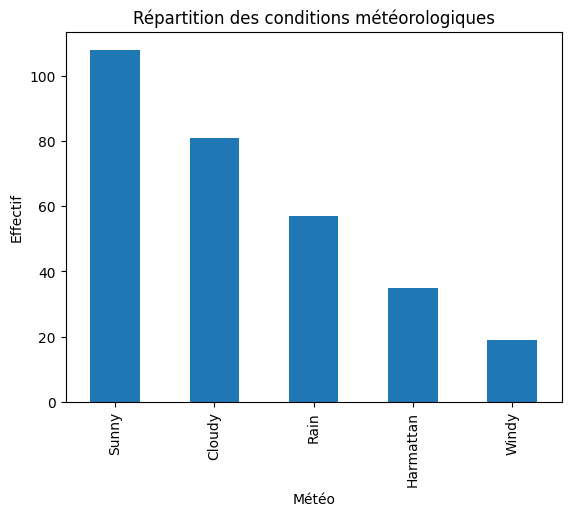

In [32]:
# Diagramme en barre
plt.figure()
df["weather"].value_counts().plot(kind="bar")
plt.title("Répartition des conditions météorologiques")
plt.xlabel("Météo")
plt.ylabel("Effectif")
plt.show()

### Agrégation des variables

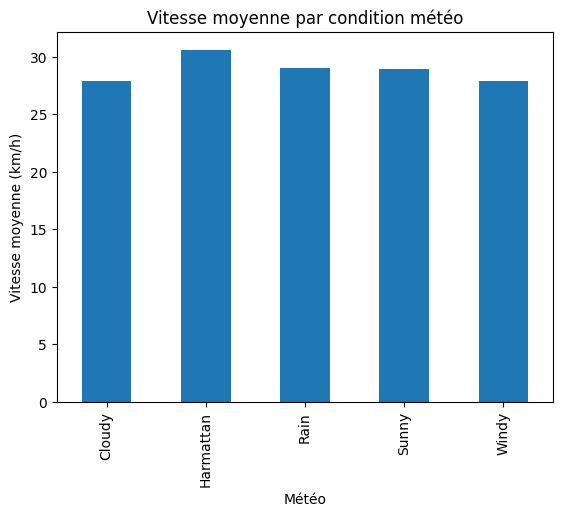

In [33]:
# Vitesse moyenne par condition météo
vitesse_moyenne_meteo = df.groupby("weather")["speed_kmh"].mean()

plt.figure()
vitesse_moyenne_meteo.plot(kind="bar")
plt.title("Vitesse moyenne par condition météo")
plt.xlabel("Météo")
plt.ylabel("Vitesse moyenne (km/h)")
plt.show()

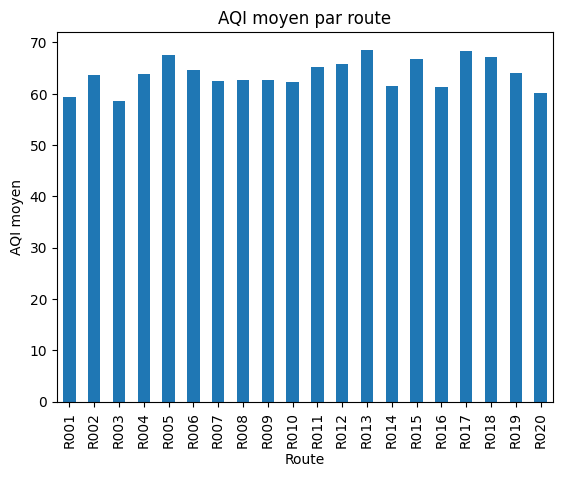

In [34]:
# Qualité air moyen par route
aqi_moyen_route = df.groupby("route_id")["air_quality_index"].mean()

plt.figure()
aqi_moyen_route.plot(kind="bar")
plt.title("AQI moyen par route")
plt.xlabel("Route")
plt.ylabel("AQI moyen")
plt.show()

## Analyse Bivariée

In [35]:
# Matrice de corrélation
corr_matrix = df[[ "speed_kmh", "traffic_density", "air_quality_index", "latitude", "longitude"]].corr()
corr_matrix

,speed_kmh,traffic_density,air_quality_index,latitude,longitude
speed_kmh,1.000000,-0.704131,-0.485844,0.034784,0.149437
traffic_density,-0.704131,1.000000,0.714387,-0.025748,-0.083577
air_quality_index,-0.485844,0.714387,1.000000,-0.032766,-0.015974
latitude,0.034784,-0.025748,-0.032766,1.000000,0.030008
longitude,0.149437,-0.083577,-0.015974,0.030008,1.000000


### Nuage de points


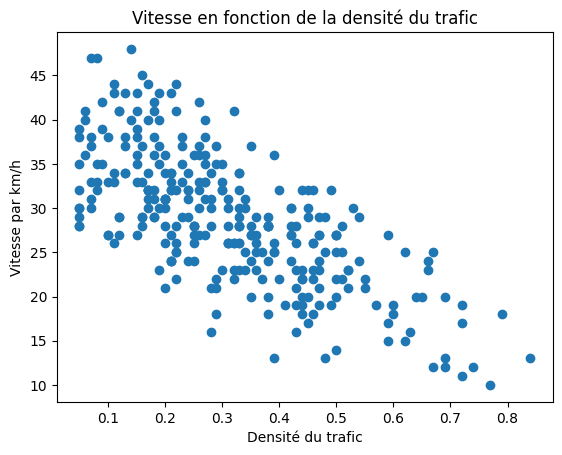

In [37]:
# Vitesse en fonction de la densité de l'air
plt.figure()
plt.scatter(df["traffic_density"], df["speed_kmh"])
plt.title("Vitesse en fonction de la densité du trafic")
plt.xlabel("Densité du trafic")
plt.ylabel("Vitesse par km/h")
plt.show()

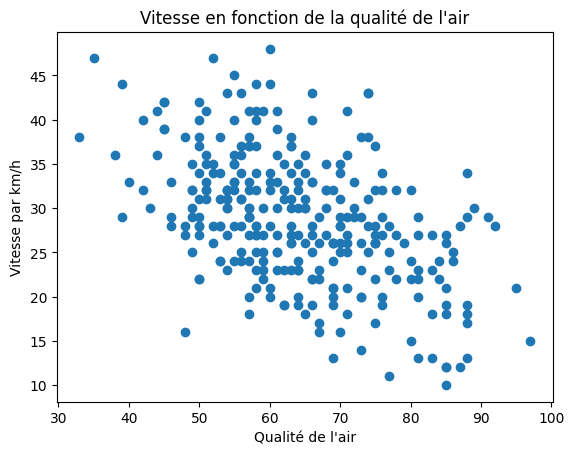

In [38]:
# Vitesse en fonction de la qualité de l'air
plt.figure()
plt.scatter(df["air_quality_index"], df["speed_kmh"])
plt.title("Vitesse en fonction de la qualité de l'air")
plt.xlabel("Qualité de l'air")
plt.ylabel("Vitesse par km/h")
plt.show()

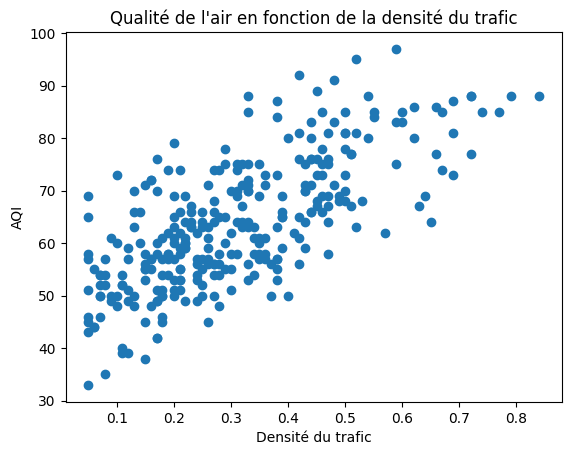

In [39]:
# Qualité de l'air en fonction de la densité du trafic
plt.figure()
plt.scatter(df["traffic_density"], df["air_quality_index"])
plt.title("Qualité de l'air en fonction de la densité du trafic")
plt.xlabel("Densité du trafic")
plt.ylabel("AQI")
plt.show()

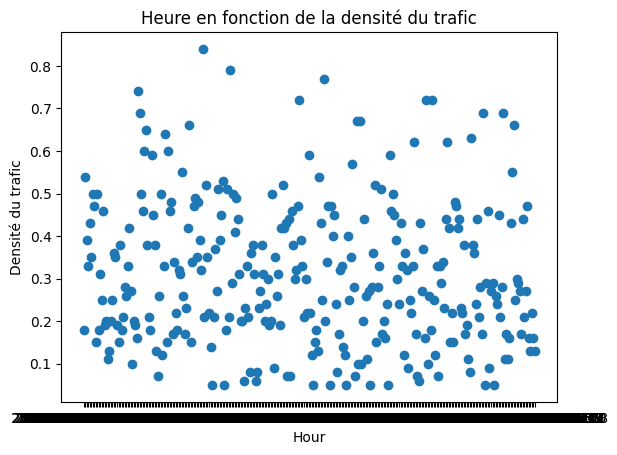

In [45]:
plt.figure()
plt.scatter(df["timestamp"], df["traffic_density"])
plt.title("Heure en fonction de la densité du trafic")
plt.xlabel("Hour")
plt.ylabel("Densité du trafic")
plt.show()

In [46]:
# Calcul de la densité moyenne par route
traffic_mean = df.groupby("route_id")["traffic_density"].mean().reset_index()
traffic_mean.rename(columns={"traffic_density": "mean_traffic_density"}, inplace=True)
traffic_mean

,route_id,mean_traffic_density
0,R001,0.287143
1,R002,0.290667
2,R003,0.303000
3,R004,0.293684
4,R005,0.355833
5,R006,0.292000
6,R007,0.309286
7,R008,0.314783
8,R009,0.354375
9,R010,0.308462


C:\Users\roger\AppData\Local\Temp\ipykernel_3372\296704702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="route_id", y = "mean_traffic_density", data = traffic_mean, palette="viridis")


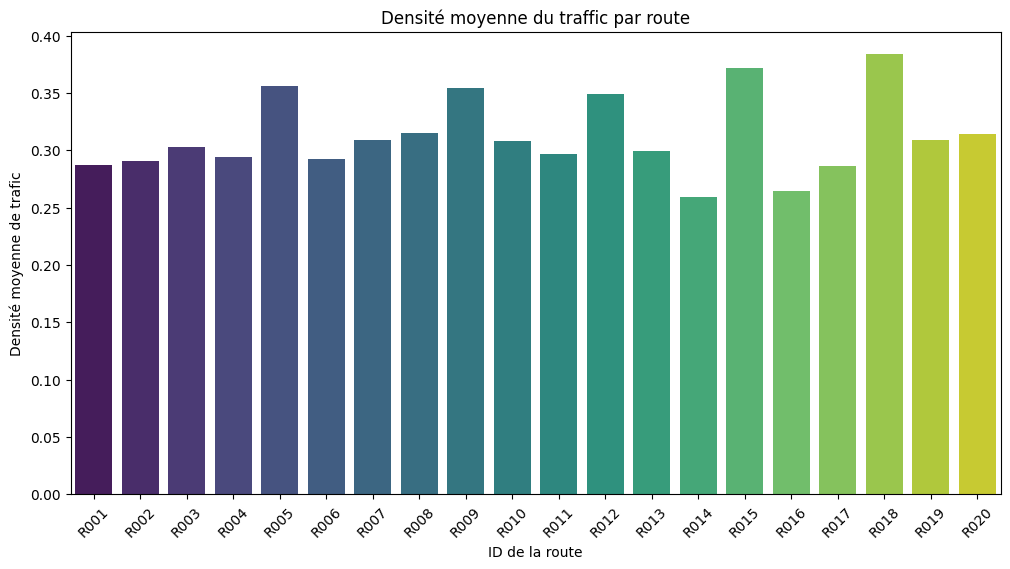

In [49]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="route_id", y = "mean_traffic_density", data = traffic_mean, palette="viridis")
plt.title("Densité moyenne du traffic par route")
plt.xlabel("ID de la route")
plt.ylabel("Densité moyenne de trafic")
plt.xticks(rotation = 45)
plt.show()

In [1]:
pip install geopy openpyxl



   ---------------------------------------- 0/2 [geographiclib]
   ---------------------------------------- 0/2 [geographiclib]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   ---------------------------------------- 2/2 [geopy]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import pandas as pd
from geopy.geocoders import Nominatim
import time

# Charger le fichier Excel (chemin relatif depuis le dossier notebooks)
excel_path = os.path.join('..', 'data', 'raw', 'mobility_urban_pollution_300.xlsx')
if not os.path.exists(excel_path):
    raise FileNotFoundError(f'Fichier Excel introuvable: {excel_path}')
df = pd.read_excel(excel_path)

# Initialiser le géocodeur
geolocator = Nominatim(user_agent="dakar_route_mapping")

def reverse_geocode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), zoom=18, addressdetails=True)
        if location and "road" in location.raw["address"]:
            return location.raw["address"]["road"]
        elif location and "neighbourhood" in location.raw["address"]:
            return location.raw["address"]["neighbourhood"]
        else:
            return "Rue non identifiée"
    except:
        return "Erreur géocodage"

# Appliquer le géocodage
street_names = []

for _, row in df.iterrows():
    street = reverse_geocode(row["latitude"], row["longitude"])
    street_names.append(street)
    time.sleep(1)  # Respect OpenStreetMap

df["street_name"] = street_names

# Sauvegarde finale
df.to_csv("routes_dakar_with_street_names.csv", index=False)

print("✅ Noms exacts des rues trouvés pour Dakar")


FileNotFoundError: [Errno 2] No such file or directory: 'mobility_urban_pollution_300.xlsx'